In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
pd.plotting.register_matplotlib_converters()

In [3]:
sales_df = pd.read_csv('Desktop\keywordvolume.csv', index_col='date', parse_dates=True)

In [4]:
df = sales_df.reset_index()

In [5]:
df.head()

,date,volume
0,2016-09-01,817390
1,2016-10-01,807380
2,2016-11-01,755260
3,2016-12-01,860660
4,2017-01-01,849320


In [6]:
df=df.rename(columns={'date':'ds', 'volume':'y'})

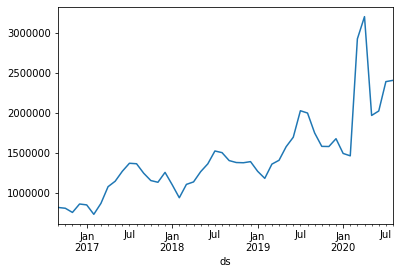

In [7]:
df.set_index('ds').y.plot()

In [8]:
model = Prophet()
model.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = model.make_future_dataframe(periods=12, freq = 'm')
future.tail()

,ds
55,2021-03-31
56,2021-04-30
57,2021-05-31
58,2021-06-30
59,2021-07-31


In [10]:
df.reset_index(drop=True)

,ds,y
0,2016-09-01,817390
1,2016-10-01,807380
2,2016-11-01,755260
3,2016-12-01,860660
4,2017-01-01,849320
5,2017-02-01,731680
6,2017-03-01,868530
7,2017-04-01,1077090
8,2017-05-01,1145470
9,2017-06-01,1269490


In [11]:
forecast = model.predict(future)

In [12]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2021-03-31,2.409857e+06,1.486259e+06,2.029833e+06,2.408347e+06,2.411447e+06,-653669.897522,-653669.897522,-653669.897522,-653669.897522,-653669.897522,-653669.897522,0.0,0.0,0.0,1.756187e+06
56,2021-04-30,2.438494e+06,2.616895e+06,3.139159e+06,2.436681e+06,2.440373e+06,429248.928175,429248.928175,429248.928175,429248.928175,429248.928175,429248.928175,0.0,0.0,0.0,2.867743e+06
57,2021-05-31,2.468086e+06,2.508742e+06,3.044355e+06,2.465916e+06,2.470355e+06,301570.967237,301570.967237,301570.967237,301570.967237,301570.967237,301570.967237,0.0,0.0,0.0,2.769657e+06
58,2021-06-30,2.496723e+06,2.504148e+06,3.042882e+06,2.494176e+06,2.499377e+06,284247.992848,284247.992848,284247.992848,284247.992848,284247.992848,284247.992848,0.0,0.0,0.0,2.780971e+06
59,2021-07-31,2.526315e+06,2.322263e+06,2.833882e+06,2.523415e+06,2.529276e+06,50645.627721,50645.627721,50645.627721,50645.627721,50645.627721,50645.627721,0.0,0.0,0.0,2.576960e+06


In [13]:
viz_df = model.predict(future)

In [14]:
viz_df.to_csv('keywordforecast7.csv')